# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                        "Lat": city_lat,
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except :
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | trinidad
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | isna
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | la ronge
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | patos
Processing Record 15 of Set 1 | jiuquan
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | palora
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | as sulayyil
Processing Record 22 of Set 1 | chonchi
Processing Record 23 of S

Processing Record 37 of Set 4 | djamaa
Processing Record 38 of Set 4 | mudurnu
Processing Record 39 of Set 4 | kidal
Processing Record 40 of Set 4 | balimila
Processing Record 41 of Set 4 | tulun
Processing Record 42 of Set 4 | hammerfest
Processing Record 43 of Set 4 | klyuchi
Processing Record 44 of Set 4 | cable beach
City not found. Skipping...
Processing Record 45 of Set 4 | ciudad lazaro cardenas
Processing Record 46 of Set 4 | zelenogorsk
Processing Record 47 of Set 4 | cole harbour
Processing Record 48 of Set 4 | keflavik
Processing Record 49 of Set 4 | ak"yar
City not found. Skipping...
Processing Record 0 of Set 5 | gaalkacyo
Processing Record 1 of Set 5 | thunder bay
Processing Record 2 of Set 5 | berbera
Processing Record 3 of Set 5 | reggane
Processing Record 4 of Set 5 | ta`u
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | popondetta
Processing Record 7 of Set 5 | al balyana
Processing Record 8 of Set 5 | deming
Processing Record 9 of Set 5 | zar

Processing Record 29 of Set 8 | yerofey pavlovich
Processing Record 30 of Set 8 | fale old settlement
Processing Record 31 of Set 8 | tezu
Processing Record 32 of Set 8 | deqen
Processing Record 33 of Set 8 | tamanrasset
Processing Record 34 of Set 8 | sao pedro
Processing Record 35 of Set 8 | olyokminsk
Processing Record 36 of Set 8 | mesquite
Processing Record 37 of Set 8 | saldanha
Processing Record 38 of Set 8 | tabuk
Processing Record 39 of Set 8 | jinchang
Processing Record 40 of Set 8 | partenit
Processing Record 41 of Set 8 | nago
Processing Record 42 of Set 8 | natal
Processing Record 43 of Set 8 | bubaque
Processing Record 44 of Set 8 | badarwas
Processing Record 45 of Set 8 | sijunjung
Processing Record 46 of Set 8 | ahau
City not found. Skipping...
Processing Record 47 of Set 8 | banff
Processing Record 48 of Set 8 | bloomsburg
Processing Record 49 of Set 8 | mawu
Processing Record 0 of Set 9 | san cristobal
Processing Record 1 of Set 9 | camarinas
Processing Record 2 of Se

Processing Record 18 of Set 12 | barra de santo antonio
Processing Record 19 of Set 12 | luderitz
Processing Record 20 of Set 12 | bengkulu
Processing Record 21 of Set 12 | sao jose da coroa grande
Processing Record 22 of Set 12 | hithadhoo
Processing Record 23 of Set 12 | okny
Processing Record 24 of Set 12 | mandera
Processing Record 25 of Set 12 | asentamiento humano nicolas de pierola
Processing Record 26 of Set 12 | ouellah
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,6.20,80,100,3.57,NZ,1691263521
1,trinidad,-14.8333,-64.9000,34.99,43,20,3.09,BO,1691263521
2,waitangi,-43.9535,-176.5597,9.03,59,100,14.91,NZ,1691263521
3,grytviken,-54.2811,-36.5092,-5.25,83,100,5.30,GS,1691263521
4,isna,25.2934,32.5540,34.01,11,50,4.88,EG,1691263522


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,6.20,80,100,3.57,NZ,1691263521
1,trinidad,-14.8333,-64.9000,34.99,43,20,3.09,BO,1691263521
2,waitangi,-43.9535,-176.5597,9.03,59,100,14.91,NZ,1691263521
3,grytviken,-54.2811,-36.5092,-5.25,83,100,5.30,GS,1691263521
4,isna,25.2934,32.5540,34.01,11,50,4.88,EG,1691263522
...,...,...,...,...,...,...,...,...,...
546,sao jose da coroa grande,-8.8978,-35.1478,25.57,77,30,4.02,BR,1691263581
547,hithadhoo,-0.6000,73.0833,27.29,77,100,2.93,MV,1691263537
548,okny,47.5404,29.4600,26.62,41,0,2.67,UA,1691263595


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

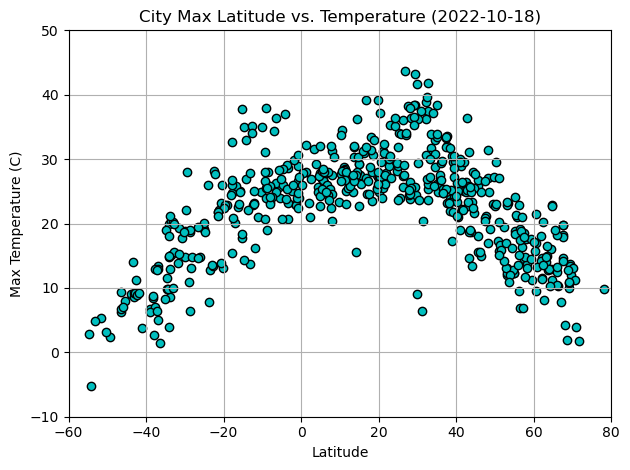

In [8]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df['Lat']
y_weather = city_data_df['Max Temp']

fig, ax = plt.subplots()

ax.scatter(x_lat, y_weather, color='c', marker='o', edgecolor='k')

# Incorporate the other graph properties
ax.grid()
ax.set_ylim(-10,50)
ax.set_xlim(-60,80)
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (C)')
ax.set_title('City Max Latitude vs. Temperature (2022-10-18)')
fig.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

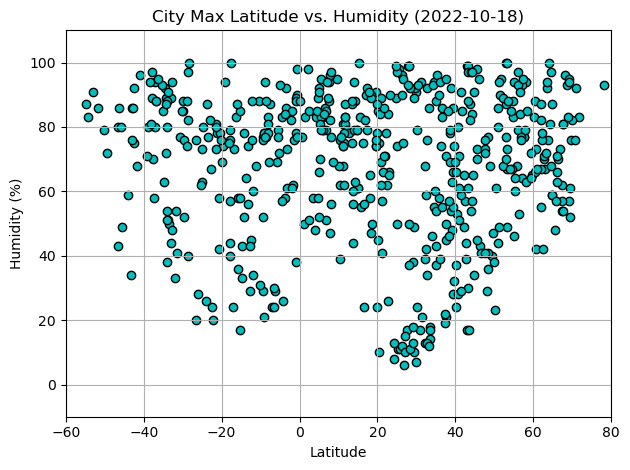

In [9]:
# Build the scatter plots for latitude vs. humidity
x_lat = city_data_df['Lat']
y_hum = city_data_df['Humidity']

fig, ax = plt.subplots()

ax.scatter(x_lat, y_hum, color='c', marker='o', edgecolor='k')

# Incorporate the other graph properties
ax.grid()
ax.set_xlim(-60,80)
ax.set_ylim(-10,110)
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Max Latitude vs. Humidity (2022-10-18)')
fig.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

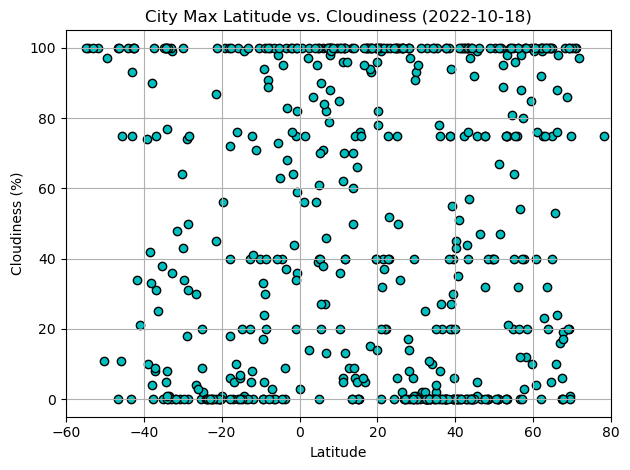

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_lat = city_data_df['Lat']
y_cloud = city_data_df['Cloudiness']

fig, ax = plt.subplots()

ax.scatter(x_lat, y_cloud, color='c', marker='o', edgecolor='k')

# Incorporate the other graph properties
ax.grid()
ax.set_xlim(-60,80)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Max Latitude vs. Cloudiness (2022-10-18)')
fig.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

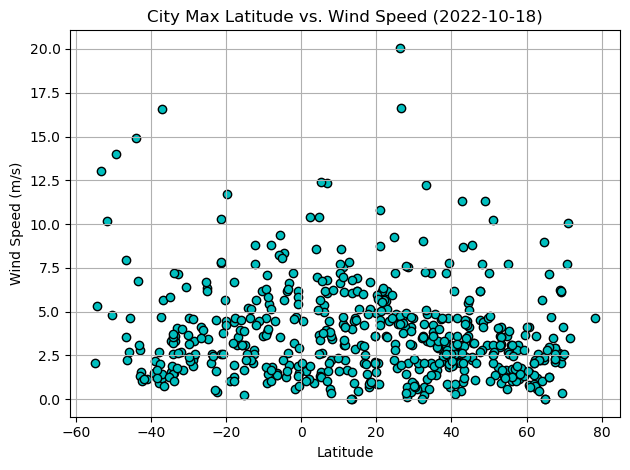

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_lat = city_data_df['Lat']
y_wind = city_data_df['Wind Speed']

fig, ax = plt.subplots()

ax.scatter(x_lat, y_wind, color='c', marker='o', edgecolor='k')

# Incorporate the other graph properties
ax.grid()
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('City Max Latitude vs. Wind Speed (2022-10-18)')
fig.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x, y, xlabel, ylabel):
    
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig, ax = plt.subplots()
    ax.scatter(x, y, color='c', marker='o', edgecolor='k')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(x, regress_values, color='r')
    plt.annotate(line_eq, (5,5), xycoords='figure points',fontsize=15,color="red")
    fig.tight_layout()
    print(f"The r-squared is: {rvalue**2}")

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,isna,25.2934,32.5540,34.01,11,50,4.88,EG,1691263522
6,utrik,11.2278,169.8474,27.92,68,96,7.57,MH,1691263416
8,hamilton,39.1834,-84.5333,29.56,63,20,4.63,US,1691263483
10,la ronge,55.1001,-105.2842,24.12,46,40,7.72,CA,1691263356
12,tiksi,71.6872,128.8694,1.71,83,97,3.47,RU,1691263523


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,6.20,80,100,3.57,NZ,1691263521
1,trinidad,-14.8333,-64.9000,34.99,43,20,3.09,BO,1691263521
2,waitangi,-43.9535,-176.5597,9.03,59,100,14.91,NZ,1691263521
3,grytviken,-54.2811,-36.5092,-5.25,83,100,5.30,GS,1691263521
5,edinburgh of the seven seas,-37.0676,-12.3116,13.45,80,8,16.55,SH,1691263308


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4295982357824945


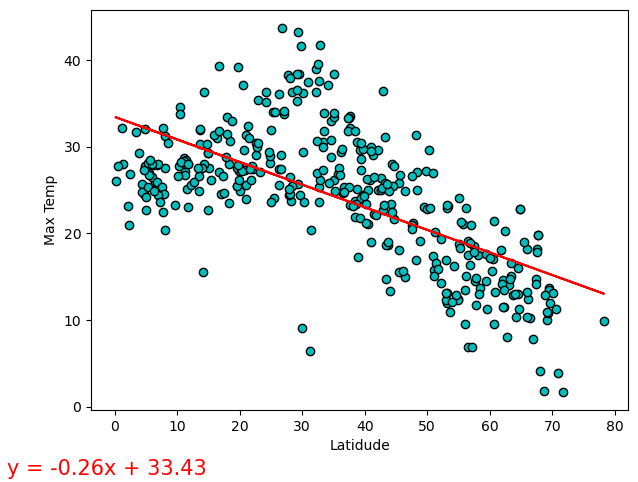

In [64]:
# Linear regression on Northern Hemisphere
x_lat = northern_hemi_df['Lat']
y_weather = northern_hemi_df['Max Temp']
x_label = "Latidude"
y_label = "Max Temp"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

The r-squared is: 0.6560515679215565


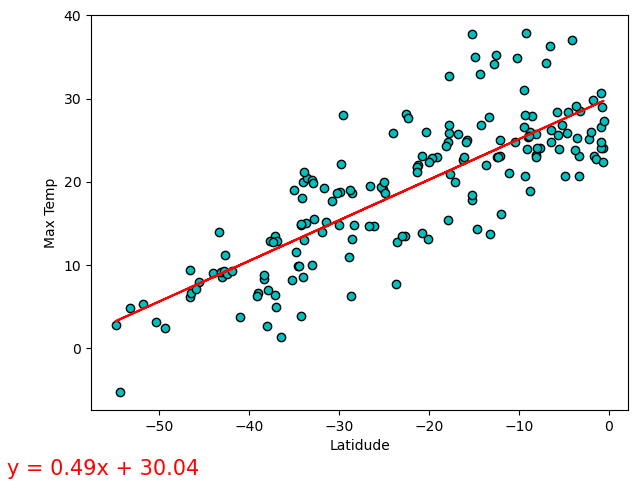

In [65]:
# Linear regression on Southern Hemisphere
x_lat = southern_hemi_df['Lat']
y_weather = southern_hemi_df['Max Temp']
x_label = "Latidude"
y_label = "Max Temp"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

**Discussion about the linear relationship:** Neither plot has an r-squared value close to 1, so there is room to find more data that better shows a relatioship. These graphs do however show a relationship. The Northern Hemisphere shows that the higher in latidude a city is, the lower the max temperature of the city. And the southern hemisphere shows that as the latidude goes down, the lower the max temperature of a city will be. The Northern Hemisphere graph does appear to have more outliers between latitude 10 and latitude 40, where it appears that the temperatures are higher in certain cities. This may be because the temperatures were taken in the summer months, which would cause the northern hemisphere to be warmer in general (as they are in summer and the southern hemisphere is in winter), and because of how the earth is positioned, areas north of the equator are warmer. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.000235465306014907


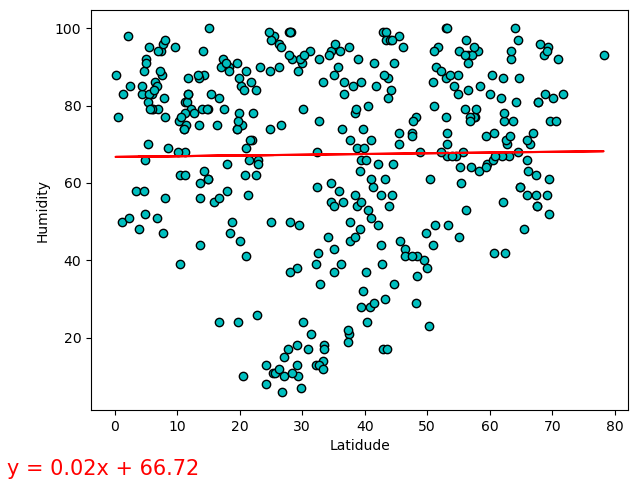

In [66]:
# Northern Hemisphere
x_lat = northern_hemi_df['Lat']
y_weather = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

The r-squared is: 0.022554485612369623


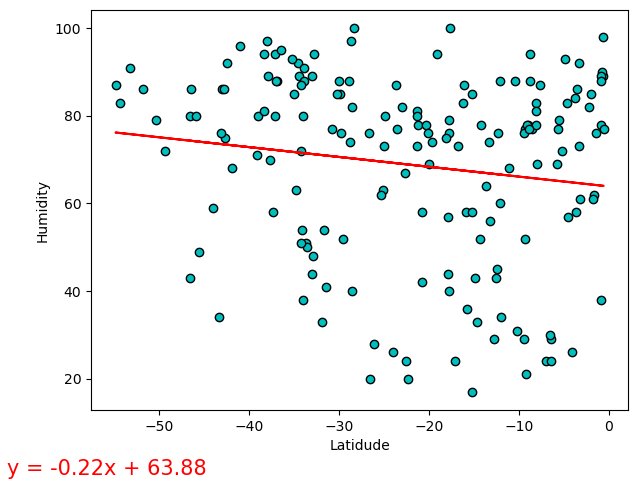

In [67]:
# Southern Hemisphere
x_lat = southern_hemi_df['Lat']
y_weather = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

**Discussion about the linear relationship:** Neither of these plots have r-squared values that are anywhere close to 1, so latidude is not very accurate predictor of humidity in a city. In the Northern Hemisphere, the linear regression plot is almost horizontal, meaning that there is almost no affect that latidude has on the humidity. This is similar in the graph for the Southern Hemisphere, although this one is slightly angled. Meaning that there is a very weak, negative relationship. As you go mroe south (lower latidude), the humidity goes up ever so slightly.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0033976932502481866


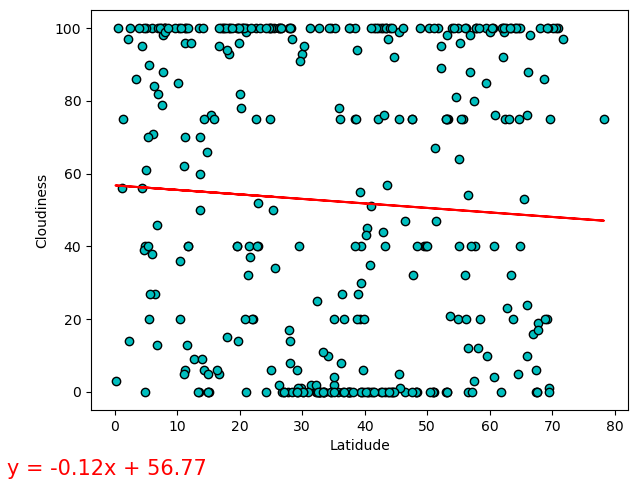

In [68]:
# Northern Hemisphere
x_lat = northern_hemi_df['Lat']
y_weather = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

The r-squared is: 0.0022587614486229857


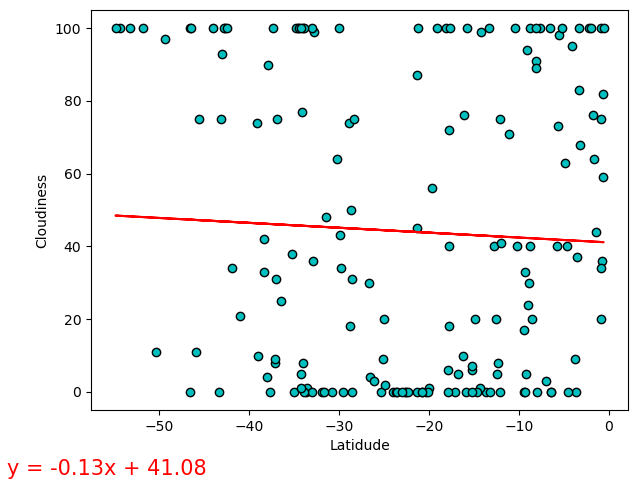

In [69]:
# Southern Hemisphere
x_lat = southern_hemi_df['Lat']
y_weather = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

**Discussion about the linear relationship:** Again, both of these plots have extremely small r-squared values, meaning that latidude is not a good predictor for cloudiness in a city. Both slopes are within 0.01 of each other, showing that neither plot has a strong correlation between latidude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03821309315151059


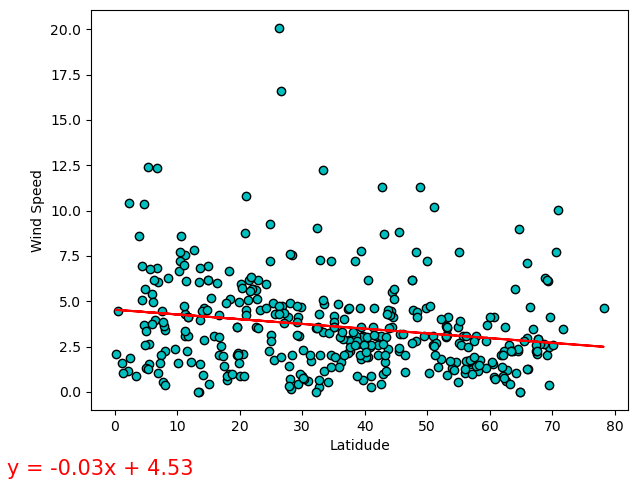

In [70]:
# Northern Hemisphere
x_lat = northern_hemi_df['Lat']
y_weather = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

The r-squared is: 0.0017008068420955513


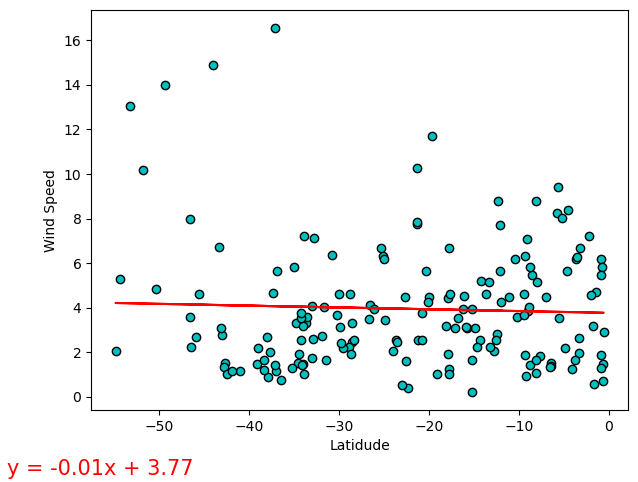

In [71]:
# Southern Hemisphere
x_lat = southern_hemi_df['Lat']
y_weather = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"

plot_lin_reg(x_lat, y_weather, x_label, y_label)

**Discussion about the linear relationship:** Again, there does not seem to be a strong relationship between wind speed and latitude. The r-squared values of these plots are extremely small, meaning wind speed is not accuratly predicted by latitude. There are quite a few outliers in the northern hemisphere, which appears to have a slightly more impactful relationship between wind speed and latitude than the southern hemisphere, but not by much. The differences in slope are 0.02, meaning that both graphs have shallow slopes and not much realtionship is shown.  